# Divide and Conquer


In [1]:
import time
import random
from random import randint
import sys

import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_array(n):
    return [randint(1, 3 * n) for e in range(n)]

** 我们已经见过的Divide and Conquer 相关的问题：**

- Binary Search
- Merge Sort
- Quick Sort

The divide-and-conquer strategy solves a problem by:
1. Breaking it into subproblems that are themselves smaller instances of the same type of problem
2. Recursively solving these subproblems
3. Appropriately combining their answers

The real work is done piecemeal, in three different places: in the partitioning of problems into subproblems; at the very tail end of the recursion, when the subproblems are so small that they are solved outright; and in the gluing together of partial answers. These are held together and coordinated by the algorithm’s core recursive structure.

## <a id='Ex1'>Ex.1: Find Medium / Find kth Element</a>

See Document.

In [3]:
# O(nlgn) time
def findKthLargest1(nums, k):
    start = time.time()
    rst = sorted(nums, reverse=True)
    t = time.time() - start
    return rst[k-1], len(rst), t

In [4]:
numbers = generate_random_array(6)
print(numbers)
m = findKthLargest1(numbers, len(numbers)//2)
m

[11, 15, 14, 16, 16, 4]


(15, 6, 4.0531158447265625e-06)

In [5]:
random_lists = [generate_random_array(1000 * n) for n in range(1, 21)]

In [6]:
rst = [findKthLargest1(l, len(l)//2) for l in random_lists]
rst

[(1516, 1000, 0.00017595291137695312),
 (3006, 2000, 0.0003829002380371094),
 (4411, 3000, 0.00061798095703125),
 (6006, 4000, 0.0008370876312255859),
 (7628, 5000, 0.0011098384857177734),
 (8893, 6000, 0.0013990402221679688),
 (10538, 7000, 0.0016739368438720703),
 (12106, 8000, 0.0017881393432617188),
 (13414, 9000, 0.002177000045776367),
 (14863, 10000, 0.002521038055419922),
 (16347, 11000, 0.0026988983154296875),
 (18075, 12000, 0.002849102020263672),
 (19737, 13000, 0.0034079551696777344),
 (20834, 14000, 0.003805875778198242),
 (22338, 15000, 0.003824949264526367),
 (23952, 16000, 0.00568389892578125),
 (25679, 17000, 0.0059587955474853516),
 (27106, 18000, 0.006580829620361328),
 (28775, 19000, 0.009123086929321289),
 (30189, 20000, 0.009804010391235352)]

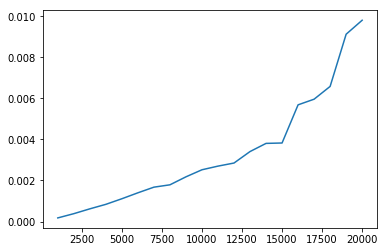

In [7]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [8]:
# O(nk) time, bubble sort idea, TLE
def findKthLargest2(nums, k):
    start = time.time()
    for i in range(k):
        for j in range(len(nums)-i-1):
            if nums[j] > nums[j+1]:
                # exchange elements, time consuming
                nums[j], nums[j+1] = nums[j+1], nums[j]
    t = time.time() - start
    return nums[len(nums)-k], len(nums), t

In [9]:
rst = [findKthLargest2(l, len(random_lists)//2) for l in random_lists]
rst

[(2974, 1000, 0.003648996353149414),
 (5965, 2000, 0.007513999938964844),
 (8977, 3000, 0.010375022888183594),
 (11968, 4000, 0.01324319839477539),
 (14971, 5000, 0.022619962692260742),
 (17972, 6000, 0.028192996978759766),
 (20963, 7000, 0.0241241455078125),
 (23973, 8000, 0.022715091705322266),
 (26980, 9000, 0.02539801597595215),
 (29952, 10000, 0.028136014938354492),
 (32975, 11000, 0.055724143981933594),
 (35984, 12000, 0.050817012786865234),
 (38959, 13000, 0.04076409339904785),
 (41968, 14000, 0.041956186294555664),
 (44974, 15000, 0.04749584197998047),
 (47975, 16000, 0.05178093910217285),
 (50974, 17000, 0.05316019058227539),
 (53976, 18000, 0.05894207954406738),
 (56975, 19000, 0.06135129928588867),
 (59966, 20000, 0.06034684181213379)]

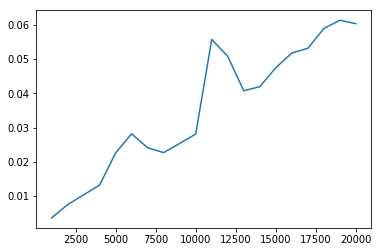

In [10]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [11]:
# O(n) time, quick selection
def findKthLargest(nums, k):
    # convert the kth largest to smallest
    start = time.time()
    rst = findKthSmallest(nums, len(nums)+1-k)
    t = time.time() - start
    return rst, len(nums), t
    
def findKthSmallest(nums, k):
    if nums:
        pos = partition(nums, 0, len(nums)-1)
        if k > pos+1:
            return findKthSmallest(nums[pos+1:], k-pos-1)
        elif k < pos+1:
            return findKthSmallest(nums[:pos], k)
        else:
            return nums[pos]
 
# choose the right-most element as pivot   
def partition(nums, l, r):
    low = l
    while l < r:
        if nums[l] < nums[r]:
            nums[l], nums[low] = nums[low], nums[l]
            low += 1
        l += 1
    nums[low], nums[r] = nums[r], nums[low]
    return low

In [12]:
numbers = generate_random_array(6)
print(numbers)
m = findKthLargest(numbers, len(numbers)//2)
m

[9, 2, 2, 11, 2, 17]


(9, 6, 8.821487426757812e-06)

In [13]:
rst = [findKthLargest(l, len(random_lists)//2) for l in random_lists]
rst

[(2974, 1000, 0.0028159618377685547),
 (5965, 2000, 0.005540132522583008),
 (8977, 3000, 0.0076541900634765625),
 (11968, 4000, 0.010528087615966797),
 (14971, 5000, 0.026948928833007812),
 (17972, 6000, 0.029178142547607422),
 (20963, 7000, 0.02215290069580078),
 (23973, 8000, 0.01892685890197754),
 (26980, 9000, 0.02134084701538086),
 (29952, 10000, 0.021159887313842773),
 (32975, 11000, 0.023223876953125),
 (35984, 12000, 0.02562093734741211),
 (38959, 13000, 0.036054134368896484),
 (41968, 14000, 0.037758827209472656),
 (44974, 15000, 0.029855966567993164),
 (47975, 16000, 0.03993821144104004),
 (50974, 17000, 0.03835701942443848),
 (53976, 18000, 0.04431509971618652),
 (56975, 19000, 0.056078195571899414),
 (59966, 20000, 0.04016995429992676)]

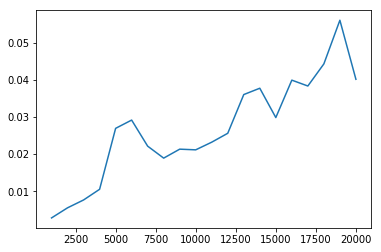

In [14]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [15]:
l = generate_random_array(1000000)

In [16]:
r = findKthLargest1(l, len(l)//2)
r

(1500270, 1000000, 0.703624963760376)

In [17]:
r = findKthLargest(l, len(l)//2)
r

(1500270, 1000000, 0.8990800380706787)